In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import torch
from data_augmentation import MRIAugmentation

In [2]:
file_path = r"C:\Custom\DataSet\ADNI_预处理后\Image\brain_adni_0156_I488420_fsld.nii.gz"

In [3]:
# 使用nibabel加载nii.gz文件
nii_img = nib.load(file_path)
nii_numpy = nii_img.get_fdata()
nii_img_process = nii_img.get_fdata()
nii_img_process = nii_img_process.astype(np.float32)
nii_img_process = torch.from_numpy(nii_img_process)
nii_img_process = nii_img_process.unsqueeze(0)
nii_img_numpy = nii_img_process
print(nii_img_process.shape)

data_transforms_resize = MRIAugmentation.get_pre_transforms()

data_transforms = MRIAugmentation.get_augmentation_transforms()

nii_img_resize = data_transforms_resize(nii_img_process).squeeze(0).numpy()
nii_img_process = data_transforms(nii_img_process).squeeze(0).numpy()

print(nii_img_process.shape)

torch.Size([1, 91, 109, 91])
(100, 100, 100)


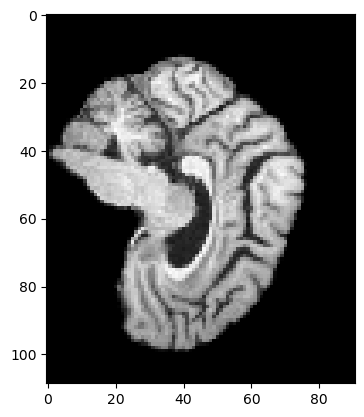

In [6]:
plt.imshow(nii_numpy[42,:,:], cmap="gray")
plt.imsave("./saggital.jpg", nii_numpy[42,:,:], cmap="gray")
plt.imsave("./coronal.jpg", nii_numpy[:,59,:], cmap="gray")
plt.imsave("./axial.jpg", nii_numpy[:,:,45], cmap="gray")

In [4]:
from mri_dataset import ADNIDataset
dataset = ADNIDataset(data_dir="E:/Data/ADNI/adni-fnirt-corrected", csv_path=r"E:\Data\ADNI\single_subject.csv", transform=MRIAugmentation.get_augmentation_transforms())
dataset[0][0].shape

torch.Size([1, 100, 100, 100])

In [13]:
print(nii_img_numpy.shape)
print(data_transforms(nii_img_numpy).shape)
print(data_transforms(nii_img_numpy)[0][50][50])
print(data_transforms(nii_img_numpy)[0][50][50])

torch.Size([1, 91, 109, 91])
torch.Size([1, 100, 100, 100])
metatensor([-0.5511, -0.5508, -0.5504, -0.5501, -0.5500, -0.5504, -0.5509, -0.5512,
        -0.5510, -0.5506, -0.5508, -0.5509, -0.5504, -0.5504, -0.4735, -0.1624,
         0.7002,  1.5896,  2.0779,  2.4024,  2.4890,  2.4772,  2.4757,  2.4614,
         2.4467,  2.4166,  2.4110,  2.2447,  1.3265,  0.6702,  0.9850,  1.4433,
         1.8677,  2.0772,  2.2055,  2.2857,  1.9784,  1.3905,  0.9271,  0.9086,
         1.1382,  1.3871,  1.5799,  1.6350,  1.6331,  1.5902,  1.4097,  1.0965,
         1.2292,  1.7531,  1.8126,  1.4981,  1.9957,  2.1640,  1.5191,  1.3617,
         1.5677,  1.7592,  1.6752,  1.5986,  1.5217,  1.4775,  1.4051,  1.1233,
         0.8571,  0.9117,  1.0486,  1.2107,  1.5880,  1.6412,  1.3759,  1.2279,
         1.1658,  1.1454,  1.1293,  1.1248,  1.0659,  0.9984,  0.8003,  0.4036,
         0.0876, -0.2770, -0.5372, -0.5505, -0.5505, -0.5498, -0.5495, -0.5499,
        -0.5501, -0.5503, -0.5503, -0.5504, -0.5507, -0.

In [ ]:
print(nii_img_process[40][40])

In [ ]:
# image为numpy数组
def visualize(image, is_save = False, is_information = False, nii_img=None):

    # 打印图像维度
    print("Image shape:", image.shape)

    # 可视化每一层切片
    num_slices = image.shape[-1]

    # 设置子图的行数和列数
    num_rows = num_slices // 10 + 1  # 每行显示10个切片
    num_cols = min(num_slices, 10)

    # 设置子图的大小
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

    # 遍历每一层切片并可视化
    for i in range(num_slices):
        row_idx = i // 10
        col_idx = i % 10

        # 在子图中显示每一层切片
        axes[row_idx, col_idx].imshow(np.flipud(image[:,:,i].T), cmap='gray', vmin=0, vmax=1)
        axes[row_idx, col_idx].axis('off')  # 关闭坐标轴

    # 如果切片数量不是10的倍数，隐藏多余的子图
    for i in range(num_slices, num_rows * num_cols):
        row_idx = i // 10
        col_idx = i % 10
        fig.delaxes(axes[row_idx, col_idx])

    plt.show()

    # 保存切片
    if is_save:
        print(f"num of slices:{num_slices}")
        plt.clf()
        for i in range(num_slices):
            # plt.imshow(image[:, :, i])
            plt.imsave(f"./image/slice_{i+1}.jpg", image[:, :, i], cmap='gray', vmin=0, vmax=1)
            


    if is_information:
    # 查看图像大小
        height, width, depth = image.shape
        print(f"The image object height: {height}, width:{width}, depth:{depth}")
        # 查看图像值范围
        print(f'image value range: [{image.min()}, {image.max()}]')

        # 查看图像成像信息，如 层厚，平面（in-plane）分辨率等

        # 矩阵以外的信息可以通过 image_obj.header 获取

        # header是键值对，查看 header 包含的所有信息
        print('headers', nii_img.header.keys())
        # 查看成像信息
        pixdim = nii_img.header['pixdim']
        print(f'z轴分辨率： {pixdim[3]}')
        print(f'in plane 分辨率： {pixdim[1]} * {pixdim[2]}')
        x_range = pixdim[1] * height
        y_range = pixdim[2] * width
        z_range = pixdim[3] * depth
        print(f"The image object x_range: {x_range}, y_range:{y_range}, z_range:{z_range}")
        # 整个数据
        print('img1_obj', nii_img)

In [ ]:
def normalize_image_0_to_1(image):
    """
    将输入的三维图像归一化到0-1范围。
    :param image: 三维Numpy数组，代表图像数据。
    :return: 归一化后的图像数据。
    """
    # 计算图像的最小值和最大值
    min_val = np.min(image)
    max_val = np.max(image)
    
    # 应用最大-最小归一化
    normalized_image = (image - min_val) / (max_val - min_val)
    
    return normalized_image

In [ ]:
visualize(normalize_image_0_to_1(nii_img.get_fdata()))

In [ ]:
visualize(normalize_image_0_to_1(nii_img_resize))

In [ ]:
nii_img_process_normailized = normalize_image_0_to_1(nii_img_process)
visualize(nii_img_process_normailized)

In [ ]:
nii_img_process_normailized[0][1]